# **Motivation:**
This exercise will explore the benefit of data augmentation on the learning performance. You will work with the CIFAR10 dataset. CIFAR10 is a standard image classification dataset frequently used as a benchmark for machine learning algorithms. The dataset is available at https://www.cs.toronto.edu/ ~kriz/cifar.html.

1.   NAME: NITYASH GAUTAM
2.   SID: 862395403
3.   UCR MAIL ID: ngaut006@ucr.edu

## IMPORTING ESSENTIALS

In [1]:
import torch
print(torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import numpy as np

1.13.1


## **FORMING THE TRAINING DATA**

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, transform=transform, download = True)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, transform=transform, download = True)

X_train = trainset.data
y_train = trainset.targets

X_test = testset.data
y_test = testset.targets

Files already downloaded and verified
Files already downloaded and verified


*SELECTING 1000 EXAMPLES UNIFORMLY AT RANDOM FROM EVERY CLASS*

In [4]:
classes = 10

train_indices = []

for label in range(classes):
  class_ind = torch.where(torch.tensor(y_train) == label)
  sampled_idx = torch.randperm(len(class_ind))[:1000]
  train_indices.extend(class_ind[sampled_idx].tolist())

training_subset = Subset(trainset, train_indices)

test_indices = []

for label in range(classes):
  class_ind = torch.where(torch.tensor(y_test) == label)
  sampled_idx = torch.randperm(len(class_ind))[:1000]
  test_indices.extend(class_ind[sampled_idx].tolist())

testing_subset = Subset(testset, test_indices)

In [5]:
batch_size = 500
train_loader = torch.utils.data.DataLoader(training_subset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testing_subset, batch_size=batch_size, shuffle=True)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
model = models.resnet18(pretrained=False).to(device)
lr = 0.001
optim_criter = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
epochs = 100

C:\Users\nitya\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\nitya\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


## **MAIN ASSIGNMENT TASKS BEGIN**

### **TASK 1 - (3 pts)** Train your Resnet model without augmentation and report the results.

In [8]:
def plot_accuracies(train_acc, test_acc):
    plt.figure(figsize=(10, 5))
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(test_acc, label='Testing Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Testing Accuracy')
    plt.legend()
    plt.show()

def plot_loss(train_loss):
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

#### Main Function

In [9]:
def train_model(model, train_loader, test_loader, epochs, optimizer, criterion, device):
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_loss_list.append(train_loss)

        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        # Calculate test accuracy for each epoch
        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for i, (inputs, labels) in enumerate(test_loader):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_acc = 100 * correct / total
        test_acc_list.append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}% - Test Acc: {test_acc:.2f}%")

    return train_loss_list, train_acc_list, test_acc_list

#### Testing the Main Function

In [10]:
t1_loss, t1_train_acc, t1_test_acc = train_model(model, train_loader, test_loader, epochs, optimizer, optim_criter, device)

Epoch [1/100] - Train Loss: 1.5617 - Train Acc: 48.56% - Test Acc: 56.16%
Epoch [2/100] - Train Loss: 1.0053 - Train Acc: 64.12% - Test Acc: 63.25%
Epoch [3/100] - Train Loss: 0.8090 - Train Acc: 71.38% - Test Acc: 67.30%
Epoch [4/100] - Train Loss: 0.6639 - Train Acc: 76.51% - Test Acc: 69.83%
Epoch [5/100] - Train Loss: 0.5398 - Train Acc: 81.12% - Test Acc: 70.70%
Epoch [6/100] - Train Loss: 0.4368 - Train Acc: 84.49% - Test Acc: 70.56%
Epoch [7/100] - Train Loss: 0.3428 - Train Acc: 87.88% - Test Acc: 69.20%
Epoch [8/100] - Train Loss: 0.2744 - Train Acc: 90.23% - Test Acc: 70.76%
Epoch [9/100] - Train Loss: 0.2110 - Train Acc: 92.65% - Test Acc: 71.51%
Epoch [10/100] - Train Loss: 0.1740 - Train Acc: 93.80% - Test Acc: 69.70%
Epoch [11/100] - Train Loss: 0.1527 - Train Acc: 94.60% - Test Acc: 72.15%
Epoch [12/100] - Train Loss: 0.1161 - Train Acc: 95.88% - Test Acc: 71.11%
Epoch [13/100] - Train Loss: 0.1053 - Train Acc: 96.38% - Test Acc: 71.64%
Epoch [14/100] - Train Loss: 0.092

********** LOSS AND ACCURACY PLOTS WITHOUT AUGMENTATION **********



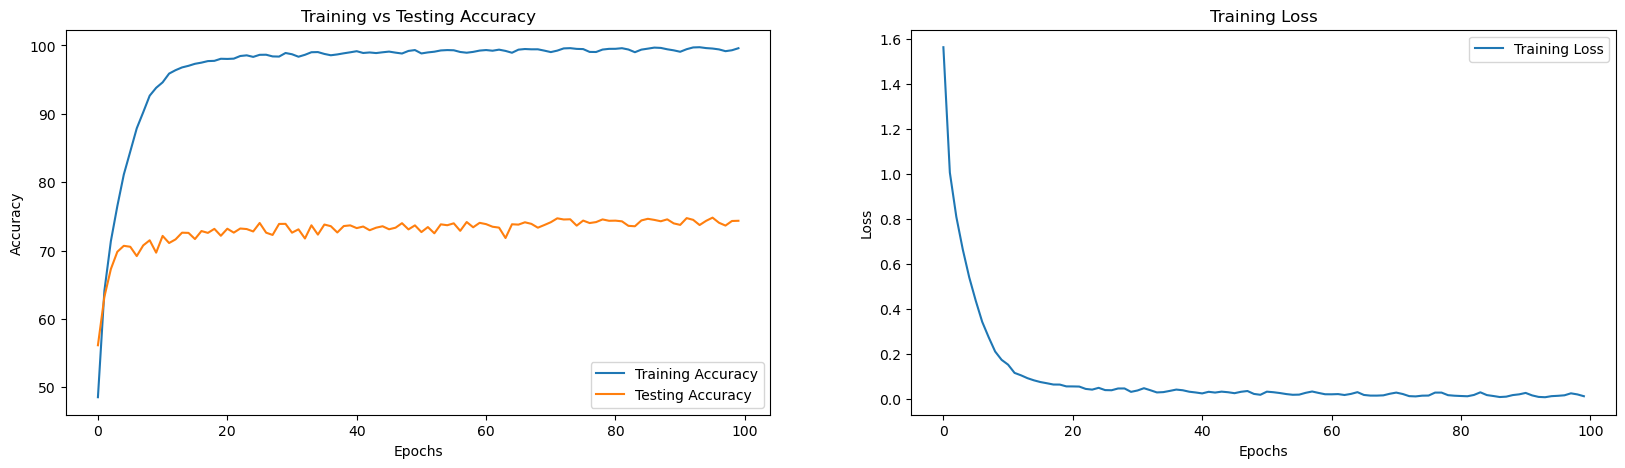


****************************************************************************************************
Final Test Accuracy: 74.36 %
****************************************************************************************************


In [11]:
print('*'*10, 'LOSS AND ACCURACY PLOTS WITHOUT AUGMENTATION', '*'*10)
  
print()

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(t1_train_acc, label='Training Accuracy')
plt.plot(t1_test_acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t1_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

print()

print('*'*100)
print('Final Test Accuracy:', t1_test_acc[-1], '%')
print('*'*100)

### **TASK 2 - (4 pts)** *Mixup Augmentation* is based on the paper https://arxiv.org/pdf/1710.09412.pdf. 
As the name suggests, it mixes a pair of training examples (both inputs and labels). Given a pair of training example (x1, y1), (x2, y2), we obtain the augmented training example (x, y) via

$$x = λx_1 + (1-λ)x_2$$
$$y = λy_1 + (1-λ)y_2$$


where mixing parameter λ has β distribution1 with parameter α.

TODO: Implement mixup and report the results for α = 0.2 and α = 0.4. Note that, in each minibatch,
all training examples should have mixup transformation before gradient calculation (e.g. from original
minibatch obtain a new minibatch by mixing random pairs of training examples).



#### Helper Functions

In [12]:
# Function to calculate accuracies
def get_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    total = labels.size(0)
    labels = torch.argmax(labels, dim=1)  # Convert mixed labels to class indices
    correct = (predicted == labels).sum().item()
    accuracy = correct / total * 100
    return accuracy

In [13]:
# Function to train the model
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    total_samples = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        train_acc += get_accuracy(outputs, labels) * images.size(0)
        total_samples += images.size(0)

    train_loss /= total_samples
    train_acc /= total_samples
    return train_loss, train_acc

In [14]:
# Function to test the model
def test(model, dataloader, criterion, device):
    model.eval()
    test_loss = 0.0
    test_acc = 0.0
    total_samples = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * images.size(0)
            test_acc += get_accuracy(outputs, labels) * images.size(0)
            total_samples += images.size(0)

    test_loss /= total_samples
    test_acc /= total_samples
    return test_loss, test_acc

In [15]:
def mixup_data(x, y, alpha):
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def get_accuracy(outputs, labels):
    _, pred = outputs.max(1)
    correct = pred.eq(labels).sum().item()
    return correct / outputs.size(0) * 100

#### Main Function

In [16]:
train_indices = []
cls = 10
for class_idx in range(cls):
  class_indices = np.where(np.array(y_train) == class_idx)[0]
  sampled_indices = np.random.choice(class_indices, size=1000, replace=False)
  train_indices.extend(sampled_indices.tolist())

train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, sampler=train_sampler, num_workers=2)

# Convert labels to one-hot encoding
trainset.targets = torch.tensor(trainset.targets)
trainset.targets = nn.functional.one_hot(trainset.targets, num_classes=10).float()

In [17]:
def train_mixup(model, train_loader, test_loader, epochs, optimizer, criterion, device, alpha):
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        train_acc = 0.0
        total_samples = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            mixed_images, labels_a, labels_b, lam = mixup_data(images, labels, alpha)
            outputs = model(mixed_images)

            labels_a = torch.max(labels_a, 1)[1]
            labels_b = torch.max(labels_b, 1)[1]

            loss = criterion(outputs, labels_a) * lam + criterion(outputs, labels_b) * (1 - lam)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

            _, preds = torch.max(outputs, 1)
            train_acc += ((preds == labels_a).float().cpu().sum() * lam + (preds == labels_b).float().cpu().sum() * (1 - lam)).item()

            total_samples += images.size(0)

        train_loss /= total_samples
        train_acc = 100. * train_acc / total_samples

        # Test model
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)

                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_acc = 100. * correct / total

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}% - Test Acc: {test_acc:.2f}%")

    return train_loss_list, train_acc_list, test_acc_list

#### Testing the Train Function


****************************************************************************************************
Running for ALPHA = 0.2
***********************
Epoch [1/100] - Train Loss: 0.6736 - Train Acc: 88.02% - Test Acc: 74.11%
Epoch [2/100] - Train Loss: 0.4368 - Train Acc: 91.22% - Test Acc: 76.41%
Epoch [3/100] - Train Loss: 0.5050 - Train Acc: 89.60% - Test Acc: 76.05%
Epoch [4/100] - Train Loss: 0.4115 - Train Acc: 92.05% - Test Acc: 76.14%
Epoch [5/100] - Train Loss: 0.5657 - Train Acc: 87.02% - Test Acc: 75.45%
Epoch [6/100] - Train Loss: 0.5929 - Train Acc: 85.51% - Test Acc: 75.17%
Epoch [7/100] - Train Loss: 0.5823 - Train Acc: 86.07% - Test Acc: 76.24%
Epoch [8/100] - Train Loss: 0.5134 - Train Acc: 88.17% - Test Acc: 76.62%
Epoch [9/100] - Train Loss: 0.4217 - Train Acc: 91.26% - Test Acc: 76.25%
Epoch [10/100] - Train Loss: 0.4578 - Train Acc: 89.39% - Test Acc: 75.22%
Epoch [11/100] - Train Loss: 0.5235 - Train Acc: 87.25% - Test Acc: 75.91%
Epoch [12/100] - Train Loss: 0.402

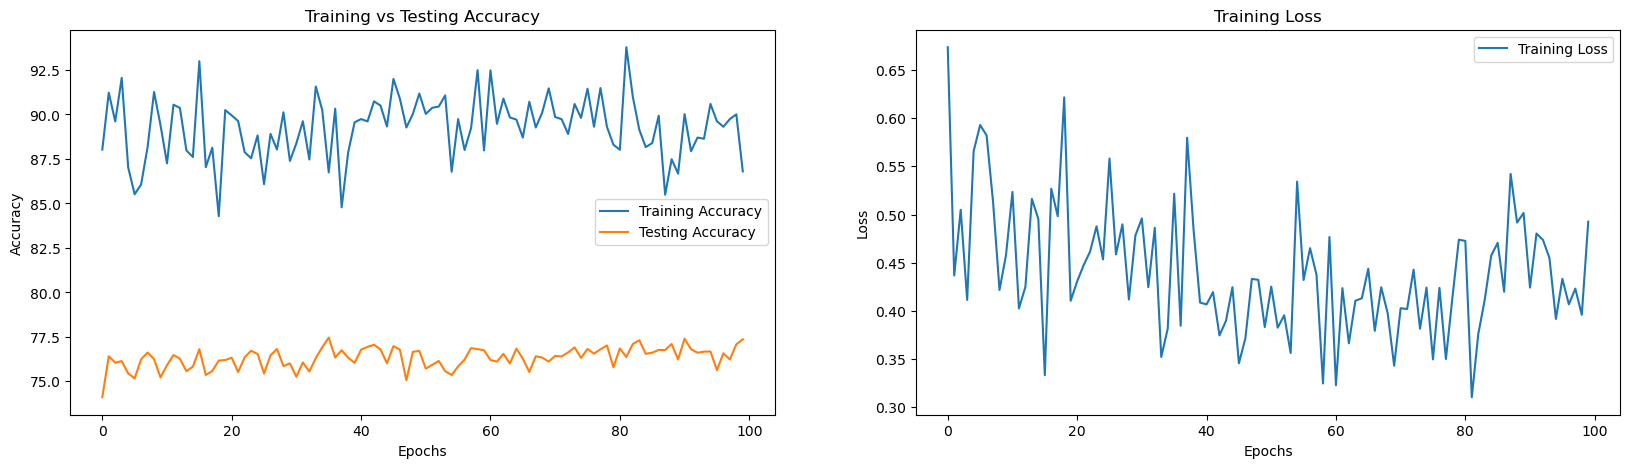


****************************************************************************************************
Running for ALPHA = 0.4
***********************
Epoch [1/100] - Train Loss: 0.6177 - Train Acc: 84.25% - Test Acc: 76.91%
Epoch [2/100] - Train Loss: 0.7150 - Train Acc: 81.17% - Test Acc: 75.77%
Epoch [3/100] - Train Loss: 0.7013 - Train Acc: 80.99% - Test Acc: 76.78%
Epoch [4/100] - Train Loss: 0.6123 - Train Acc: 83.92% - Test Acc: 77.24%
Epoch [5/100] - Train Loss: 0.6197 - Train Acc: 85.02% - Test Acc: 76.47%
Epoch [6/100] - Train Loss: 0.6666 - Train Acc: 82.15% - Test Acc: 77.33%
Epoch [7/100] - Train Loss: 0.6487 - Train Acc: 82.56% - Test Acc: 77.46%
Epoch [8/100] - Train Loss: 0.6027 - Train Acc: 83.43% - Test Acc: 77.69%
Epoch [9/100] - Train Loss: 0.6135 - Train Acc: 83.77% - Test Acc: 76.89%
Epoch [10/100] - Train Loss: 0.7376 - Train Acc: 80.51% - Test Acc: 76.28%
Epoch [11/100] - Train Loss: 0.6102 - Train Acc: 83.51% - Test Acc: 76.95%
Epoch [12/100] - Train Loss: 0.666

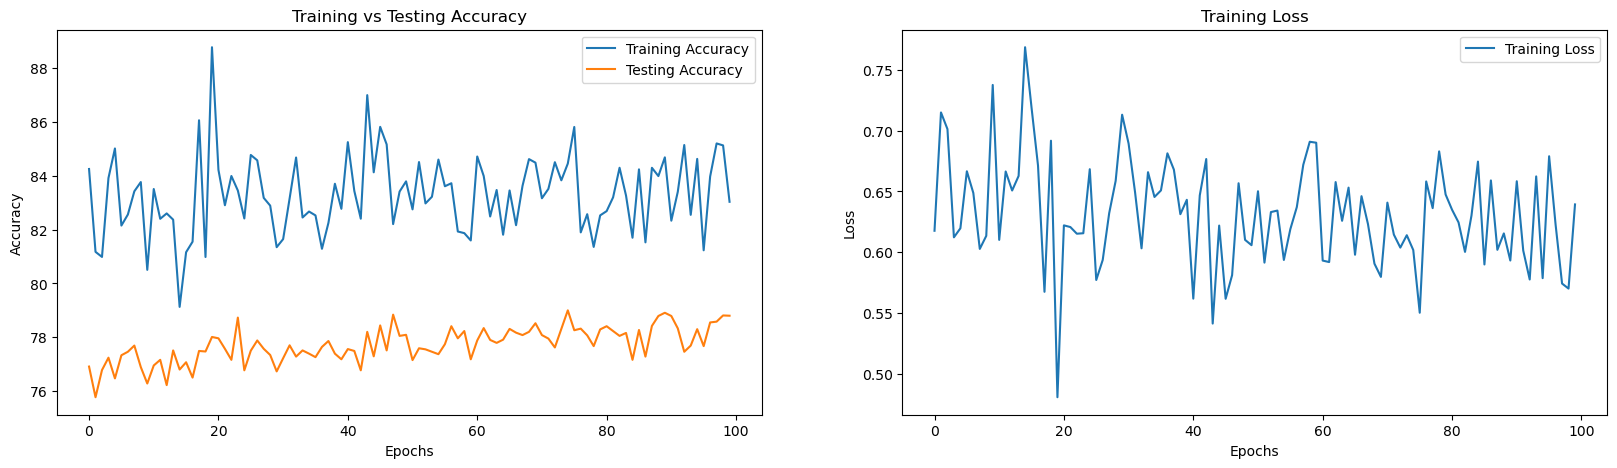

In [18]:
for alpha in [0.2, 0.4]:
  print()
  print('*'*100)
  print('Running for ALPHA =', alpha)
  print('*'*23)

  mixup_loss = []
  mixup_train_acc = []
  mixup_test_acc = []

  t2_loss, t2_train_acc, t2_test_acc = train_mixup(model, train_loader, test_loader, epochs, optimizer, optim_criter, device, alpha)

  print()

  print('LOSS AND ACCURACY PLOTS FOR ALPHA:', alpha)
  
  print()
  
  plt.figure(figsize=(20, 5))

  plt.subplot(1, 2, 1)
  plt.plot(t2_train_acc, label='Training Accuracy')
  plt.plot(t2_test_acc, label='Testing Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training vs Testing Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(t2_loss, label='Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training Loss')
  plt.legend()
  plt.show()

  mixup_loss.append(t2_loss)
  mixup_train_acc.append(t2_train_acc)
  mixup_test_acc.append(t2_test_acc)

In [36]:
print('*'*100)
print('Final Test Accuracy:', np.mean(mixup_test_acc), '%')
print('*'*100)
print()

****************************************************************************************************
Final Test Accuracy: 77.7185 %
****************************************************************************************************



### **TASK 3 - (4 pts)** *Cutout Augmentation* is based on the paper https://arxiv.org/pdf/1708.04552.pdf. 

For each training image with 50% probability you keep the image intact. With 50% probability, select a random pixel which serves as the center of your cutout mask. Then, set the square mask of size K × K pixels around this center pixel to be zero. Note that part of the mask is allowed to be outside of the image. For visualization, see Figure 1 of the paper.

**TODO:** Implement and use cutout augmentation with K = 16 and report the results.

#### Helper Functions

In [20]:
# Function to implement CUTOUT AUGMENTATION
def cutout(imgs, mask_size):
    if mask_size <= 0:
        return imgs
    h, w = imgs.shape[2], imgs.shape[3]
    mask_value = imgs.min()

    cutout_imgs = imgs.clone()  # Create a copy of the original images

    for idx in range(cutout_imgs.shape[0]):
        img = cutout_imgs[idx]
        for _ in range(1):
            top = np.random.randint(0 - mask_size // 2, h - mask_size)
            left = np.random.randint(0 - mask_size // 2, w - mask_size)
            bottom = top + mask_size
            right = left + mask_size

            if top < 0:
                top = 0
            if left < 0:
                left = 0

            img[:, top:bottom, left:right] = mask_value
    return cutout_imgs


#### Main Function

In [21]:
def train_cutout(model, train_loader, test_loader, epochs, optimizer, criterion, device, mask_size):
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        train_acc = 0.0
        total_samples = 0

        for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)

          # If labels are one-hot encoded, convert them to class indices
          if labels.dim() > 1:
              labels = torch.argmax(labels, dim=1)

          # Apply cutout augmentation
          images = cutout(images, mask_size=mask_size)

          outputs = model(images)
          loss = criterion(outputs, labels)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          _, predicted = torch.max(outputs.data, 1)
          total_samples += labels.size(0)
          correct = (predicted == labels).sum().item()
          train_loss += loss.item() * images.size(0)
          train_acc += correct * 100

        train_loss /= total_samples
        train_acc /= total_samples

        # Evaluate on the test set
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc = 100 * correct / total

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}% - Test Acc: {test_acc:.2f}%")

    return train_loss_list, train_acc_list, test_acc_list

#### Testing the Train Function

In [22]:
mask_size = 16
t3_loss, t3_train_acc, t3_test_acc = train_cutout(model, train_loader, test_loader, epochs, optimizer, optim_criter, device, mask_size)

Epoch [1/100] - Train Loss: 0.6413 - Train Acc: 78.84% - Test Acc: 77.49%
Epoch [2/100] - Train Loss: 0.4391 - Train Acc: 85.10% - Test Acc: 76.95%
Epoch [3/100] - Train Loss: 0.3652 - Train Acc: 87.40% - Test Acc: 77.63%
Epoch [4/100] - Train Loss: 0.3265 - Train Acc: 88.76% - Test Acc: 79.22%
Epoch [5/100] - Train Loss: 0.2841 - Train Acc: 90.22% - Test Acc: 78.94%
Epoch [6/100] - Train Loss: 0.2645 - Train Acc: 90.74% - Test Acc: 78.99%
Epoch [7/100] - Train Loss: 0.2419 - Train Acc: 91.78% - Test Acc: 78.47%
Epoch [8/100] - Train Loss: 0.2278 - Train Acc: 92.20% - Test Acc: 79.15%
Epoch [9/100] - Train Loss: 0.2052 - Train Acc: 93.09% - Test Acc: 79.14%
Epoch [10/100] - Train Loss: 0.1910 - Train Acc: 93.34% - Test Acc: 79.79%
Epoch [11/100] - Train Loss: 0.1791 - Train Acc: 93.73% - Test Acc: 79.56%
Epoch [12/100] - Train Loss: 0.1725 - Train Acc: 94.02% - Test Acc: 79.76%
Epoch [13/100] - Train Loss: 0.1637 - Train Acc: 94.40% - Test Acc: 79.17%
Epoch [14/100] - Train Loss: 0.158

********** LOSS AND ACCURACY PLOTS FOR CUTOUT AUGMENTATION **********



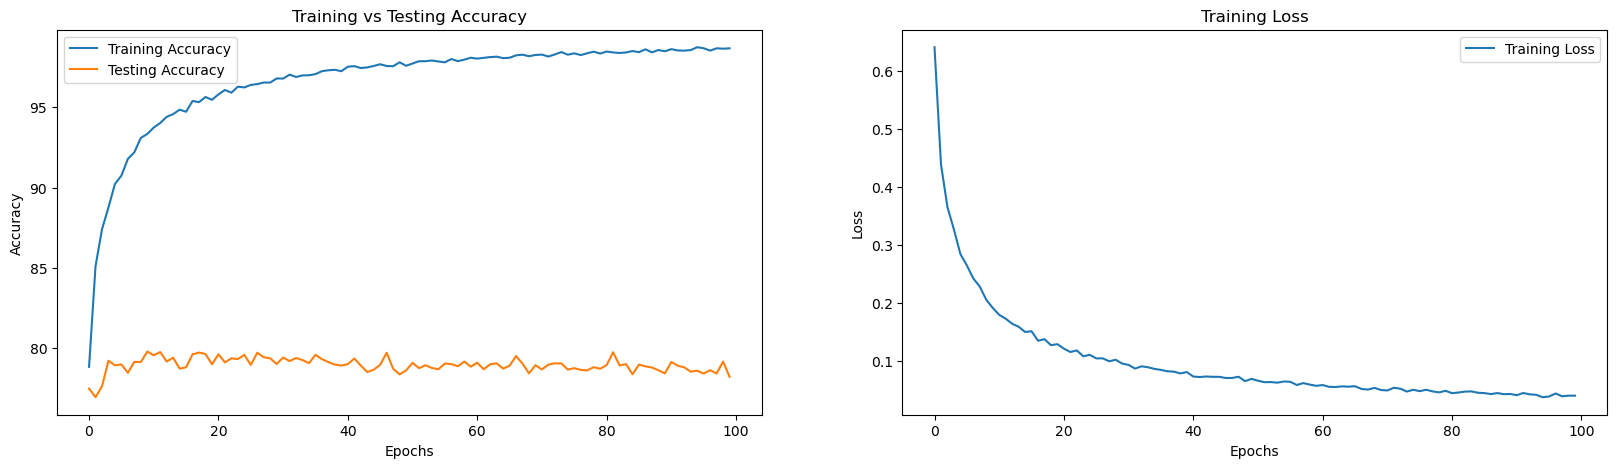


****************************************************************************************************
Final Test Accuracy: 78.22 %
****************************************************************************************************


In [23]:
print('*'*10, 'LOSS AND ACCURACY PLOTS FOR CUTOUT AUGMENTATION', '*'*10)

print()

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(t3_train_acc, label='Training Accuracy')
plt.plot(t3_test_acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t3_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

print()

print('*'*100)
print('Final Test Accuracy:', t3_test_acc[-1], '%')
print('*'*100)

### **TASK 4 - (4 pts)** *Standard Augmentation* applies horizontal flip and random shifts. See the website https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/ 

for illustrations.

Given an input image, first you shift it left-right and up-down as follows. Pick two independent integers $k_1, k_2$ uniformly between [−K,K] range. Move image upwards by $k_1$ and rightwards by $k_2$ pixels (negative value means downwards and leftwards). Zero pad the missing pixels. After this random shift, with 50% probability, apply a horizontal flip on the image.

**TODO:** Implement standard augmentation with K = 4 and report the results.

#### Main Functions

In [24]:
# Function to Implement Standard Augmentation
def standard_augmentation(imgs, K):
    h, w = imgs.shape[2], imgs.shape[3]
    new_imgs = torch.zeros_like(imgs)

    for idx in range(imgs.shape[0]):
        img = imgs[idx]

        k1 = np.random.randint(-K, K)
        k2 = np.random.randint(-K, K)
        flip = np.random.rand() > 0.5

        img = torch.roll(img, shifts=[k1, k2], dims=[1, 2])

        if flip:
            img = torch.flip(img, [2])
        
        new_imgs[idx] = img

    return new_imgs

In [25]:
def train_standard_aug(model, train_loader, test_loader, epochs, optimizer, criterion, device):
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        train_acc = 0.0
        total_samples = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Apply standard augmentation
            images = standard_augmentation(images, K=4)

            outputs = model(images)
            
            # Convert one-hot encoded labels to class indices
            _, labels = torch.max(labels, 1)

            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct = (predicted == labels).sum().item()
            train_loss += loss.item() * images.size(0)
            train_acc += correct * 100

        train_loss /= total_samples
        train_acc /= total_samples

        # Evaluate on the test set
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc = 100 * correct / total

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}% - Test Acc: {test_acc:.2f}%")

    return train_loss_list, train_acc_list, test_acc_list

#### Testing the Train Function

In [26]:
t4_loss, t4_train_acc, t4_test_acc = train_standard_aug(model, train_loader, test_loader, epochs, optimizer, optim_criter, device)

Epoch [1/100] - Train Loss: 0.6520 - Train Acc: 79.23% - Test Acc: 81.07%
Epoch [2/100] - Train Loss: 0.5044 - Train Acc: 82.75% - Test Acc: 81.78%
Epoch [3/100] - Train Loss: 0.4597 - Train Acc: 84.17% - Test Acc: 82.23%
Epoch [4/100] - Train Loss: 0.4319 - Train Acc: 85.17% - Test Acc: 82.61%
Epoch [5/100] - Train Loss: 0.4066 - Train Acc: 86.17% - Test Acc: 82.99%
Epoch [6/100] - Train Loss: 0.3826 - Train Acc: 86.95% - Test Acc: 82.66%
Epoch [7/100] - Train Loss: 0.3653 - Train Acc: 87.30% - Test Acc: 83.25%
Epoch [8/100] - Train Loss: 0.3551 - Train Acc: 87.82% - Test Acc: 83.05%
Epoch [9/100] - Train Loss: 0.3359 - Train Acc: 88.51% - Test Acc: 83.41%
Epoch [10/100] - Train Loss: 0.3289 - Train Acc: 88.72% - Test Acc: 83.13%
Epoch [11/100] - Train Loss: 0.3107 - Train Acc: 89.29% - Test Acc: 83.34%
Epoch [12/100] - Train Loss: 0.3010 - Train Acc: 89.51% - Test Acc: 83.55%
Epoch [13/100] - Train Loss: 0.2928 - Train Acc: 89.76% - Test Acc: 83.41%
Epoch [14/100] - Train Loss: 0.283

********** LOSS AND ACCURACY PLOTS FOR STANDARD AUGMENTATION **********



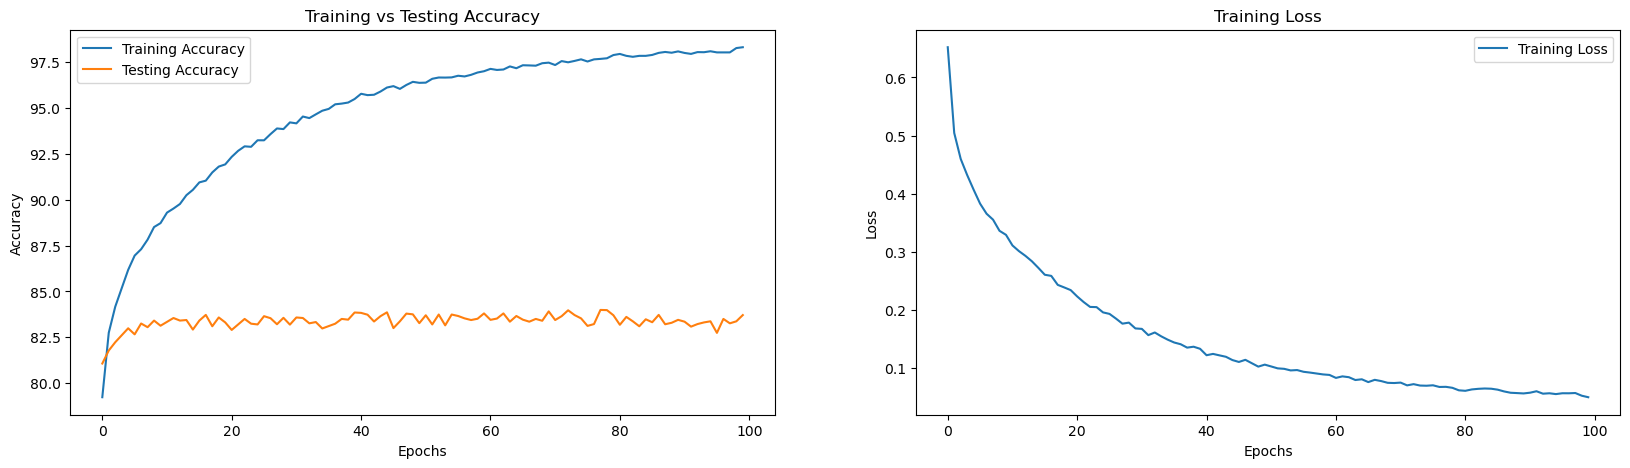


****************************************************************************************************
Final Test Accuracy: 83.71 %
****************************************************************************************************


In [27]:
print('*'*10, 'LOSS AND ACCURACY PLOTS FOR STANDARD AUGMENTATION', '*'*10)
  
print()

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(t4_train_acc, label='Training Accuracy')
plt.plot(t4_test_acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t4_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

print()

print('*'*100)
print('Final Test Accuracy:', t4_test_acc[-1], '%')
print('*'*100)

### **TASK 5 - (3 pts)** Combine all augmentations together.

First apply standard and cutout augmentations on the
training images and then apply mixup to blend them. For mixup, use the parameter α that has higher
test accuracy. Report the results. Does combining improve things further? 

#### Helper Functions

In [28]:
# Function to Calculate Accuracies
def get_acc(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    total_predictions = 0

    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    model.train()
    return (correct_predictions / total_predictions) * 100

#### Main Functions

In [29]:
# Explicitly defining the function to perform Mixup Augmentation
def updated_mixup_data(x, y, alpha=1.0):
    '''Compute the mixup data. Return mixed inputs, pairs of targets, and lambda'''
    if alpha > 0.:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.
        
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    
    # Convert one-hot encoded labels to class indices
    _, y_a = torch.max(y, 1)
    _, y_b = torch.max(y[index], 1)
    
    return mixed_x, y_a, y_b, lam

In [30]:
# Explicitly defining the function to perform Combined Augmentation
def combine_augmentations(images, labels, alpha, K, mask_size):
    # Apply standard and cutout augmentations
    images = standard_augmentation(images, K)
    images = cutout(images, mask_size)

    # Apply mixup augmentation
    mixed_images, labels_a, labels_b, lam = updated_mixup_data(images, labels, alpha)

    return mixed_images, labels_a, labels_b, lam

In [31]:
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

In [32]:
def train_combined_aug(model, train_loader, test_loader, epochs, optimizer, criterion, device, alpha, K, mask_size):
    model = model.to(device)

    train_loss_arr = []
    train_acc_arr = []
    test_acc_arr = []

    for epoch in range(epochs):
        train_loss = 0.0
        train_acc = 0.0
        correct = 0.0
        total_samples = 0.0
        
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            inputs, labels_a, labels_b, lam = combine_augmentations(inputs, labels, alpha, K, mask_size)
            
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, labels_a, labels_b, lam)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels_a.size(0)
            correct += ((predicted == labels_a) * lam + (predicted == labels_b) * (1 - lam)).sum().item()
            train_loss += loss.item() * inputs.size(0)
            train_acc += correct

        train_loss /= total_samples
        train_acc /= total_samples

        train_loss_arr.append(train_loss)
        train_acc_arr.append(train_acc)
        
        test_acc = get_acc(model, test_loader, device)
        test_acc_arr.append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}% - Test Acc: {test_acc:.2f}%")

    return train_loss_arr, train_acc_arr, test_acc_arr


#### Testing the Train Function

In [33]:
K=4
t5_loss, t5_train_acc, t5_test_acc = train_combined_aug(model, train_loader, test_loader, epochs, optimizer, optim_criter, device, alpha, K, mask_size)

Epoch [1/100] - Train Loss: 1.7453 - Train Acc: 19.71% - Test Acc: 73.11%
Epoch [2/100] - Train Loss: 1.2878 - Train Acc: 31.54% - Test Acc: 80.69%
Epoch [3/100] - Train Loss: 1.1728 - Train Acc: 31.73% - Test Acc: 80.97%
Epoch [4/100] - Train Loss: 1.0292 - Train Acc: 34.63% - Test Acc: 82.72%
Epoch [5/100] - Train Loss: 1.1086 - Train Acc: 32.85% - Test Acc: 82.99%
Epoch [6/100] - Train Loss: 1.0306 - Train Acc: 35.14% - Test Acc: 83.23%
Epoch [7/100] - Train Loss: 1.0530 - Train Acc: 34.42% - Test Acc: 83.35%
Epoch [8/100] - Train Loss: 1.0575 - Train Acc: 34.63% - Test Acc: 83.19%
Epoch [9/100] - Train Loss: 0.9644 - Train Acc: 35.92% - Test Acc: 82.75%
Epoch [10/100] - Train Loss: 0.9610 - Train Acc: 35.44% - Test Acc: 83.53%
Epoch [11/100] - Train Loss: 1.0048 - Train Acc: 34.69% - Test Acc: 82.71%
Epoch [12/100] - Train Loss: 0.9369 - Train Acc: 36.43% - Test Acc: 82.71%
Epoch [13/100] - Train Loss: 0.9170 - Train Acc: 36.21% - Test Acc: 83.69%
Epoch [14/100] - Train Loss: 0.958

********** LOSS AND ACCURACY PLOTS FOR COMBINED AUGMENTATION **********



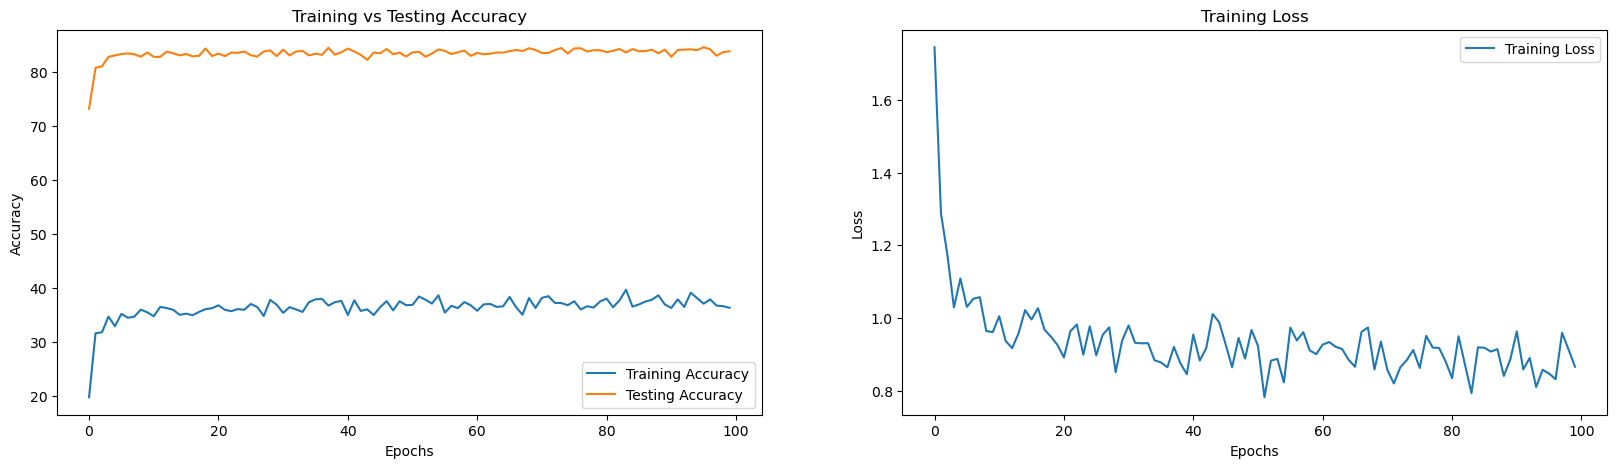


****************************************************************************************************
Final Test Accuracy: 83.75 %
****************************************************************************************************


In [34]:
print('*'*10, 'LOSS AND ACCURACY PLOTS FOR COMBINED AUGMENTATION', '*'*10)
  
print()

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(t5_train_acc, label='Training Accuracy')
plt.plot(t5_test_acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t5_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

print()

print('*'*100)
print('Final Test Accuracy:', t5_test_acc[-1], '%')
print('*'*100)

### **TASK 6 - (2 pts)** Comment on the role of data augmentation. How does it affect test accuracy, train accuracy and the convergence of optimization? Is test accuracy higher? Does training loss converge faster?

Performing Data Augmentation has been beneficial. The trend in the train accuracy is that it has increased slightly (not much) after implementing each Augmentation Technique. The Test Accuracy on the other hand shows major improvement after the implementation of every augmentation technique. The loss also converges quickly as seen in the results.

In summary, Data augmentation helps generalize the model more and in result give out good results on unseen data.